# Наивный Байесовкий алгоритм

Наивный байесовский алгоритм - это алгоритм, который обычно используется в задачах обработки естественного языка (NLP), таких как фильтрация спама, анализ настроений, классификация, рекомендации. Он основан на теореме Байеса, как показано ниже.

<img src="https://github.com/Bhasfe/ml-algorithms/blob/master/Naive%20Bayes/bayesian.png?raw=true" width="300px" height="300px" align="left" /><br><br>

*P(A|B)* = вероятность A, если произойдет B
*P(B|A)* = вероятность B, если произойдет A
*P(A)* = вероятность A
*P(B)* = вероятность В

В scikit-learn существует 3 типа наивных байесовских алгоритмов.

1. Гауссовский наивный Байес: Работает с непрерывными атрибутами, предполагает нормальное распределение данных (гауссово распределение)
2. Многочленный наивный Байес: Работает с частотами признаков. Используется для текстовой классификации
3. Наивный Байес Бернулли: Он работает с многочленными двоичными переменными, обычно используемыми для классификации текста

Мы будем использовать Многочленный Байесовский классификатор.

### Основы обработки естественного языка (NLP)
- Лемматизация: Это процесс создания одинаковых слов в их основе. Например, "бегать", "бегал", "бегущий" отличаются для компа. Мы лемматизируем слово, чтобы получить слово "бегать".
- Стоп-слова: Слова, которые не важны с точки зрения контекста
Токенизация: Процесс выделения слов в предложении с помощью пробелов и знаков препинания. Мы будем использовать [word_tokenize] от nltk(https://www.nltk.org/api/nltk.tokenize.html)
- Bag of Words: BoW - это представление текстовых данных числовым способом, с которым могут работать алгоритмы машинного обучения
- Tf-idf: Это статистическая концепция, которая используется для определения важности слов в корпусе. Мы будем использовать TfidfVectorizer. Векторизатор вычислит вес каждого слова в корпусе и вернет матрицу tf-idf.<br>

<img src="https://github.com/Bhasfe/ml-algorithms/blob/master/Naive%20Bayes/tfidf.png?raw=true" width="300px" height="300px" align="left" /><br><br>
*tf* = Частота термина (количество встречаемости каждого i в j)
*df* = Частота документа
*N* = Количество документов
*w* = вес tf-idf
для каждого *i* и *j* (документа).

Перед началом выполнения кода убедитесь, что установлено все необходимое:

`pip install -U scikit-learn`

`pip install wordcloud`

`pip install --user -U nltk`

In [1]:
import nltk

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


True

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Импортируем NLTK, чтобы использовать его функции в текстах
'''
Не забываем скачать необходимое
nltk.download('punkt')
nltk.download('wordnet')
'''
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Мы будем визуализировать сообщения с помощью облака слов
from wordcloud import WordCloud

# Многочленный наивный Байесовский классификатор
from sklearn.naive_bayes import MultinomialNB

# Импортируем векторизатор
from sklearn.feature_extraction.text import TfidfVectorizer

# Импортируем кодировщик меток
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

%matplotlib inline

# Включим intellisense в ноутбуке Jupyter
%config IPCompleter.greedy=True

In [3]:
data = pd.read_csv('Datasets/spam_classification.csv')

In [4]:
display(data.head())
display(data.describe())
print(data.info())

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


Category
ham     4825
spam     747
Name: count, dtype: int64

Category
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64


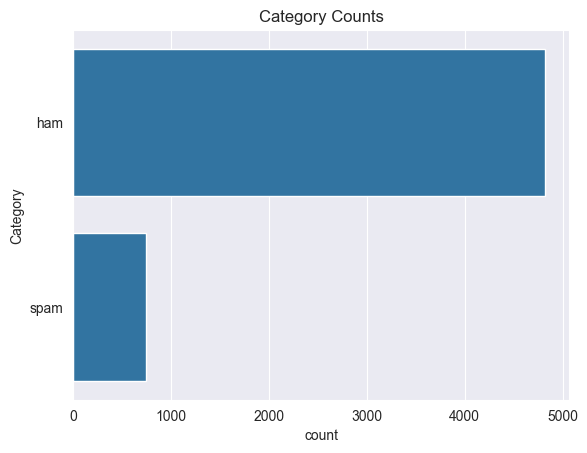

In [5]:
print(data['Category'].value_counts())
print()
print(data['Category'].value_counts(normalize=True))
sns.countplot(data['Category'])
plt.title("Category Counts")
plt.show()

Как мы можем видеть выше, набор данных несбалансирован. Мы должны учитывать это при построении нашей модели. Кроме того, нам нужно закодировать метки, чтобы использовать нашу модель. Для достижения этой цели мы будем использовать LabelEncoder из scikit-learn

In [6]:
le = LabelEncoder()
data['Category_enc'] = le.fit_transform(data['Category'])
display(data.head())
print(data.dtypes)

,Category,Message,Category_enc
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


Category        object
Message         object
Category_enc     int32
dtype: object


Мы получили закодированные категории. Теперь 0 = не спам и 1 = спам.

## Разработка функций

Прежде чем строить модель классификации, давайте изучим данные. Сначала мы сравним количество слов в сообщениях в каждой категории

Category
ham     14.310259
spam    23.812584
Name: word_count, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_20228\1453765902.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Category'] == 'spam']['word_count'], label='СПАМ')
C:\Users\Admin\AppData\Local\Temp\ipykernel_20228\1453765902.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[dat

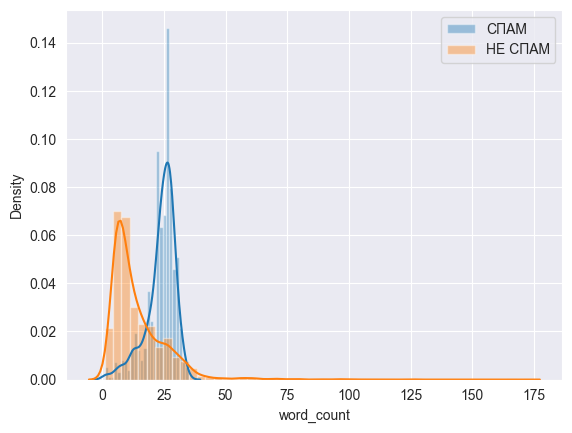

In [8]:
data['word_count'] = data['Message'].str.split().str.len()
print(data.groupby('Category')['word_count'].mean())
sns.distplot(data[data['Category'] == 'spam']['word_count'], label='СПАМ')
sns.distplot(data[data['Category'] == 'ham']['word_count'], label='НЕ СПАМ'),
plt.legend()
plt.show()

Очевидно, что спам-сообщения, как правило, содержат большее количество слов. Как насчет наиболее распространенных слов в каждом из них?

In [9]:
tokenized_messages = data['Message'].str.lower().apply(word_tokenize)
print(tokenized_messages)

0       [go, until, jurong, point, ,, crazy, .., avail...
1                [ok, lar, ..., joking, wif, u, oni, ...]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor, ..., u, c, alrea...
4       [nah, i, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568      [will, ü, b, going, to, esplanade, fr, home, ?]
5569    [pity, ,, *, was, in, mood, for, that, ., so, ...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                  [rofl, ., its, true, to, its, name]
Name: Message, Length: 5572, dtype: object


Там есть некоторые не буквенно-цифровые символы (* ' " - ) и стоп-слова, такие как a, and, the и т.д. Давайте отбросим их

In [10]:
def alpha(tokens):
    alpha = []
    for token in tokens:
        if str.isalpha(token) or token in ['n\'t', 'won\'t']:
            if token == 'n\'t':
                alpha.append('not')
                continue
            elif token == 'won\'t':
                alpha.append('wont')
                continue
            alpha.append(token)
    return alpha


tokenized_messages = tokenized_messages.apply(alpha)
print(tokenized_messages)

0       [go, until, jurong, point, crazy, available, o...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, in, a, wkly, comp, to, win, fa, ...
3       [u, dun, say, so, early, hor, u, c, already, t...
4       [nah, i, do, not, think, he, goes, to, usf, he...
                              ...                        
5567    [this, is, the, time, we, have, tried, contact...
5568         [will, ü, b, going, to, esplanade, fr, home]
5569    [pity, was, in, mood, for, that, so, any, othe...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                     [rofl, its, true, to, its, name]
Name: Message, Length: 5572, dtype: object


Пришло время разобраться со стоп-словами. Мы уже импортировали стоп-слова из nltk.

In [11]:
def remove_stop_words(tokens):
    no_stop = []
    for token in tokens:
        if token not in stopwords.words('english'):
            no_stop.append(token)
    return no_stop


tokenized_messages = tokenized_messages.apply(remove_stop_words)
print(tokenized_messages)

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, wkly, comp, win, fa, cup, final,...
3           [u, dun, say, early, hor, u, c, already, say]
4          [nah, think, goes, usf, lives, around, though]
                              ...                        
5567    [time, tried, contact, u, pound, prize, claim,...
5568                   [ü, b, going, esplanade, fr, home]
5569                            [pity, mood, suggestions]
5570    [guy, bitching, acted, like, interested, buyin...
5571                                   [rofl, true, name]
Name: Message, Length: 5572, dtype: object


Более того, нам нужно лемматизировать слова. Мы уже импортировали WordNetLemmatizer из nltk.

In [12]:
def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized = []
    for token in tokens:
        lemmatized.append(lemmatizer.lemmatize(token))
    return " ".join(lemmatized)


tokenized_messages = tokenized_messages.apply(lemmatize)
print(tokenized_messages)

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts may...
3                     u dun say early hor u c already say
4                     nah think go usf life around though
                              ...                        
5567    time tried contact u pound prize claim easy ca...
5568                          ü b going esplanade fr home
5569                                 pity mood suggestion
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object


Заменим столбец message на tokenized_messages

In [13]:
data['Message'] = tokenized_messages
display(data.head())

,Category,Message,Category_enc,word_count
0,ham,go jurong point crazy available bugis n great ...,0,20
1,ham,ok lar joking wif u oni,0,6
2,spam,free entry wkly comp win fa cup final tkts may...,1,28
3,ham,u dun say early hor u c already say,0,11
4,ham,nah think go usf life around though,0,13


Визуализируем слова, которые чаще всего используются в сообщениях каждого типа.

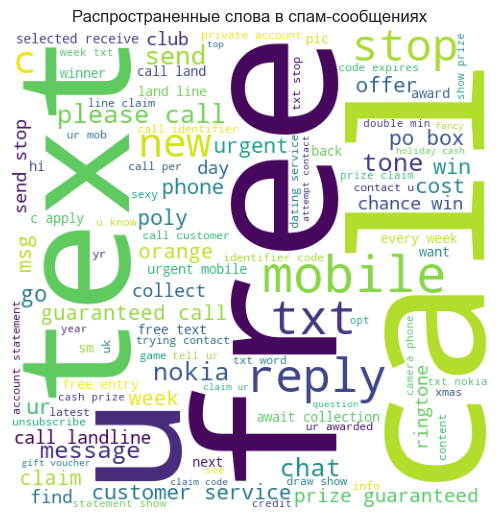

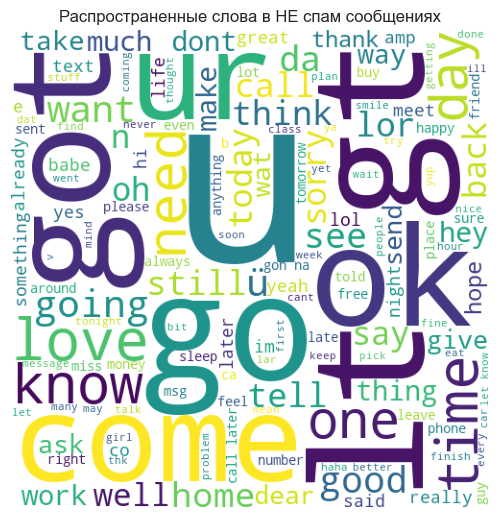

In [14]:
spam = data[data['Category'] == 'spam']['Message'].str.cat(sep=', ')
ham = data[data['Category'] == 'ham']['Message'].str.cat(sep=', ')
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(spam)
                   
plt.figure(figsize=(5, 5), facecolor=None)
plt.imshow(spam_wc)
plt.axis("off")
plt.title("Распространенные слова в спам-сообщениях")
plt.tight_layout(pad=0)
plt.show()
ham_wc = wc.generate(ham)
                      
plt.figure(figsize=(5, 5), facecolor=None)
plt.imshow(ham_wc)
plt.axis("off")
plt.title("Распространенные слова в НЕ спам сообщениях")
plt.tight_layout(pad=0)
plt.show()

Похоже, что обычные сообщения содержат много аббревиатур и неофициальных слов. Спам, как правило, содержит в основном те слова, которые мы отобразили на изображении.

## Построение модели

In [15]:
# Выберем фичи и таргет
X = data['Message']
y = data['Category_enc']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

Теперь мы можем получить tf-idf, используя TfidfVectorizer от scikit-learn. Tf-idf расшифровывается как "частота термина - обратная частоте документа". Обычно используется при обработке естественного языка для определения наиболее важных слов в документе.

In [17]:
vectorizer = TfidfVectorizer(strip_accents='ascii')
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)

In [18]:
nb = MultinomialNB()
nb.fit(tfidf_train, y_train)
print("Accuracy:", nb.score(tfidf_test, y_test))

Accuracy: 0.9605381165919282


## Оценим модель

Показателя accuracy недостаточно, чтобы сказать, что производительность нашей модели отличная. Нам нужно провести дополнительные расчеты, чтобы убедиться в этом

Confusion Matrix

[[966   0]
 [ 44 105]]


Classification Report

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.70      0.83       149

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115


ROC AUC Score: 0.8523489932885906


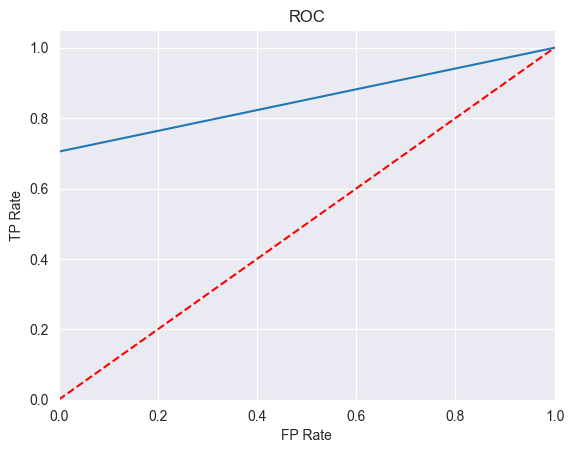

In [19]:
y_pred = nb.predict(tfidf_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)

auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:", auc_score)

y_pred_proba = nb.predict(tfidf_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()

Область под кривой ROC оказалась ниже, но все равно выглядит нормально. Согласно матрице ошибок и отчету о классификации, наша модель идеально подходит для обнаружения спама.